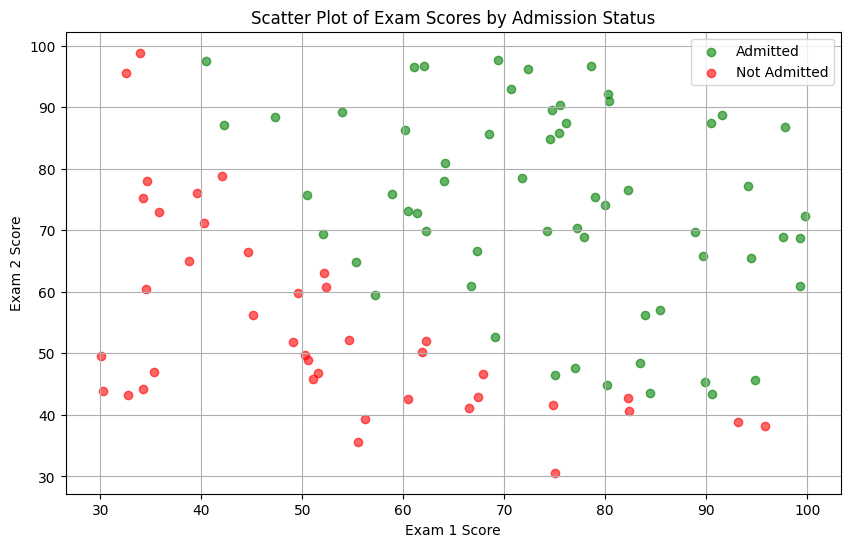

Coefficients: [[0.25970232 0.22481016]]
Intercept: [-30.20000099]
Accuracy: 0.8
Precision: 0.9
Recall: 0.75
Confusion Matrix:
 [[7 1]
 [3 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

# Charger le jeu de données
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

# Visualiser les données avec un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Admitted'] == 1]['Exam 1'], data[data['Admitted'] == 1]['Exam 2'], label='Admitted', color='green', alpha=0.6)
plt.scatter(data[data['Admitted'] == 0]['Exam 1'], data[data['Admitted'] == 0]['Exam 2'], label='Not Admitted', color='red', alpha=0.6)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Scatter Plot of Exam Scores by Admission Status')
plt.legend()
plt.grid(True)
plt.show()

# Préparer les données pour le modèle
X = data[['Exam 1', 'Exam 2']]
y = data['Admitted']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implémenter la régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Faire des prédictions
y_pred = log_reg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

# Calculer la précision et le rappel
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Générer une matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Générer un rapport de classification
class_report = classification_report(y_test, y_pred)

# Afficher les résultats
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


The logistic regression model we trained provides several insights and performance metrics that help us understand its effectiveness in predicting student admissions based on exam scores. Here's an interpretation of the results:

Logistic Regression Coefficients:

Exam 1 and Exam 2 Coefficients: The positive coefficients for both Exam 1 and Exam 2 (approximately 0.26 and 0.22, respectively) indicate that higher scores on either exam are associated with a higher likelihood of admission. This suggests that both exams contribute positively to the admission decision.

Intercept: The intercept term (approximately -30.20) represents the log-odds of admission when both exam scores are zero. While this value itself isn't practically interpretable (since exam scores of zero are unlikely), it is a necessary component of the logistic regression equation.

Model Accuracy:

Accuracy of 80%: This means that the model correctly predicts the admission status for 80% of the students in the test set. An accuracy of 80% is generally considered good, but it's important to look at other metrics to fully understand the model's performance, especially if the classes are imbalanced.
Precision and Recall:

Precision of 90%: This high precision indicates that when the model predicts a student will be admitted, it is correct 90% of the time. High precision is crucial when the cost of a false positive (predicting admission when the student is not actually admitted) is high.

Recall of 75%: This recall rate means that the model identifies 75% of all students who were actually admitted. Recall is important when the cost of a false negative (not predicting admission when the student is actually admitted) is high.

Confusion Matrix:

The confusion matrix provides a breakdown of correct and incorrect classifications:
True Negatives (7): The model correctly predicted non-admission for 7 students.
False Positives (1): The model incorrectly predicted admission for 1 student who was not admitted.
False Negatives (3): The model incorrectly predicted non-admission for 3 students who were admitted.
True Positives (9): The model correctly predicted admission for 9 students.
Classification Report:

The classification report summarizes the precision, recall, and F1-score for each class. The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. The macro and weighted averages give an overall sense of model performance across both classes.
Overall Interpretation:

The logistic regression model performs well with a good balance between precision and recall. The model is particularly good at predicting admissions correctly when it makes a positive prediction (high precision). However, there is room for improvement in recall, which would help capture more of the actual admissions.

If the goal is to minimize false negatives (i.e., ensure more admitted students are correctly identified), efforts could be made to improve recall, potentially by adjusting the decision threshold or gathering more data. Conversely, if the goal is to minimize false positives, maintaining high precision is key.